In [1]:
# Import Packages
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from nltk import FreqDist
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from scipy import signal


stop_words = list(set(stopwords.words('english')))

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/philiprundall/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/philiprundall/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/philiprundall/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [47]:
df = pd.read_csv("/Users/philiprundall/Python/Econ_412 /Project_2/Part1_test.csv", names=["Class","Title","Summary"], header=None) # Read table
manipulated = df.copy() # make a copy

# Visualize Data

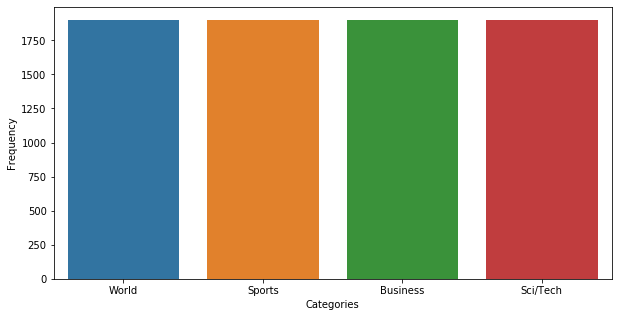

In [48]:
#Visualize classes
classes = ['World', 'Sports', 'Business', 'Sci/Tech']

fig = plt.figure(figsize=(10,5))
ax = sns.barplot(x=df["Class"].unique(),y=df["Class"].value_counts())
ax.set(xlabel='Categories', ylabel = 'Frequency')
plt.xticks(range(4), classes )
plt.show()

# Parsing
## this part isnt actually used :( bc theres a package that does it not as well but whatever

In [27]:
Summary = manipulated.iloc[:,1] # Just using the summary for now use 2 or title use 1

In [28]:
S = [re.sub(r'[^\w]', ' ', i) for i in Summary.to_numpy()] #Remove punctuation

S = [i.split(' ') for i in S] #Tokenize

S = [[j for j in i if j != ''] for i in S] # remove all empty words

S = [[v for v in w if not v in stop_words] for w in S] # Remove stop words

S = [[PorterStemmer().stem(i) for i in j] for j in S] #Convert all words into their stems ie running, ran, runs alll become run

# Extracting relevant Words

In [49]:
###Parameter for graph
#Number of the most significant words you wish to use
SignificantWords = 20

In [50]:
allwords = []
for i in S:
    for j in i:
        allwords.append(j)

In [51]:
commonwords = FreqDist(allwords)

In [52]:

comwordslist = commonwords.most_common(SignificantWords)


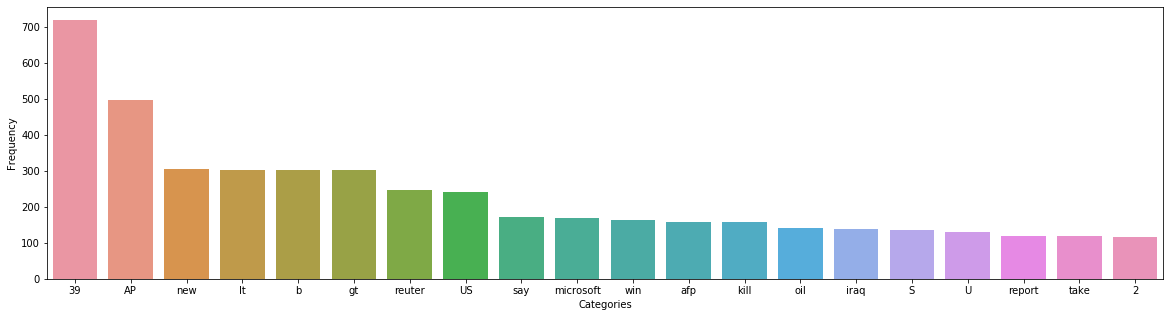

In [53]:
commonwords.most_common(SignificantWords)
#Visualize classes
fig = plt.figure(figsize=(20,5))
ax = sns.barplot(x = [i[0] for i in comwordslist], y = [i[1] for i in comwordslist])
ax.set(xlabel='Categories', ylabel = 'Frequency')
plt.xticks(range(0,SignificantWords), [i[0] for i in comwordslist])
plt.show()

[('AP', 193), ('39', 173), ('kill', 147), ('iraq', 130), ('afp', 125), ('lt', 90), ('b', 90), ('gt', 90), ('reuter', 88), ('U', 77), ('S', 76), ('US', 76), ('say', 74), ('bush', 66), ('new', 66), ('bomb', 62), ('talk', 59), ('UN', 52), ('israel', 50), ('attack', 50)]
[('39', 239), ('AP', 196), ('win', 116), ('game', 77), ('lt', 72), ('b', 72), ('gt', 72), ('lead', 52), ('sox', 46), ('cup', 44), ('back', 41), ('red', 41), ('new', 41), ('No', 41), ('open', 40), ('take', 39), ('1', 38), ('first', 37), ('final', 37), ('gold', 36)]
[('39', 157), ('US', 123), ('oil', 122), ('stock', 95), ('profit', 88), ('lt', 78), ('b', 78), ('gt', 78), ('price', 76), ('cut', 73), ('new', 66), ('updat', 65), ('share', 65), ('reuter', 64), ('rise', 62), ('buy', 57), ('sale', 57), ('Up', 53), ('say', 51), ('fall', 51)]
[('39', 150), ('microsoft', 149), ('new', 132), ('AP', 92), ('reuter', 79), ('launch', 63), ('lt', 62), ('b', 62), ('gt', 62), ('ibm', 60), ('com', 58), ('googl', 45), ('secur', 45), ('linux', 

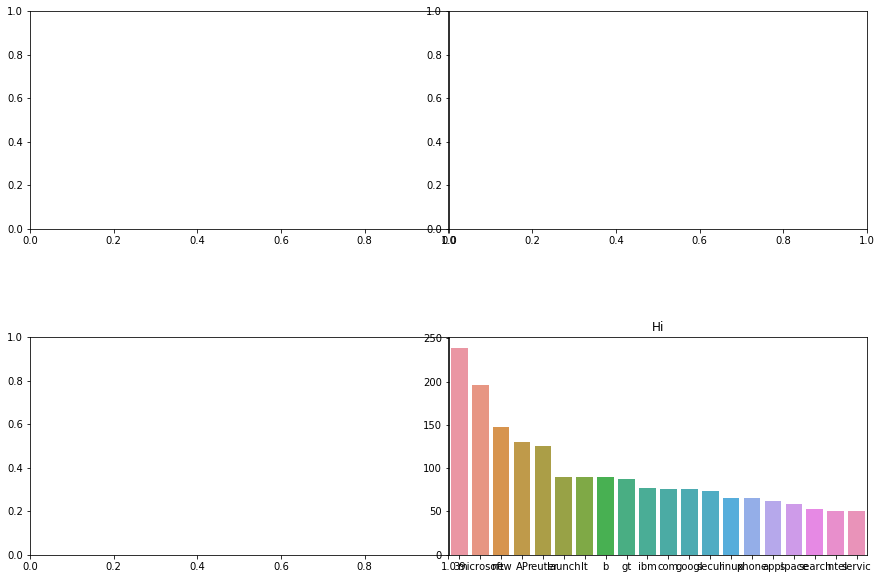

In [54]:
#still working on this to get parrallel histograms for each of the classes more used words


fig, axs = plt.subplots(2,2, figsize=(15, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()
axs = axs.flatten()

for k in range(4):
    tempwords = np.asarray(S)[manipulated[manipulated["Class"] == (k+1)].index.to_list()]
    allwords = []
    for i in tempwords:
        for j in i:
            allwords.append(j)
    tempcomwords = FreqDist(allwords).most_common(SignificantWords)
    print(tempcomwords)
    axs[k] = sns.barplot(x = [i[0] for i in tempcomwords], y = [i[1] for i in tempcomwords])
    axs[k].set_title("Hi")


# Binary Weighting

In [61]:
classnwords = df.Class.copy()
manipulated = df.copy()

In [56]:
for word in comwordslist: #Making columns for each significant word
    manipulated[word[0]] = 0
manipulated = manipulated.iloc[:,3:]

lst2 = [i[0] for i in comwordslist] # Just the common words

In [57]:
for i in range(len(S)):
    lst1 = S[i] # the parsed article
    lst3 = [value for value in lst1 if value in lst2] # the union of these
    
    manipulated[lst3].iloc[i,:] = 1

/Users/philiprundall/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/philiprundall/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


# ==============================Actual=========================================

In [62]:
Sum = [re.sub(r'[^\w]', ' ', i) for i in Summary.to_numpy()] 

In [63]:
ReviewVzer = CountVectorizer(min_df=2, tokenizer=nltk.word_tokenize, max_features=2500)
X = ReviewVzer.fit_transform(Sum)

In [64]:
Y = manipulated["Class"].to_numpy()

# Logistic Regression Model


In [ ]:
multinomial = LogisticRegression(penalty = 'l1', multi_class = 'multinomial', solver='saga')

In [ ]:
multinomial.fit(X,Y)

# Evaluation Logistic

In [ ]:
#Insample correvct values
correct = 0 
predictions = multinomial.predict(X)
for i in range(len(Y)):
    if predictions[i] == Y[i]:
        correct += 1

In [ ]:
print("Insample Accuracy = ", correct/len(Y))

In [ ]:
cm = confusion_matrix(Y, predictions)
pd.DataFrame(cm, index = classes, columns = classes)

# KNN


In [18]:
KNN = KNeighborsClassifier(n_neighbors=2).fit(X,Y)

NameError: name 'Y' is not defined

In [19]:
correct = 0 
predictions = KNN.predict(X)
for i in range(len(Y)):
    if predictions[i] == Y[i]:
        correct += 1
print("Insample Accuracy = ", correct/len(Y))

NameError: name 'KNN' is not defined

# LDA


In [126]:
LDA = LinearDiscriminantAnalysis()

In [127]:
LDA.fit(X.toarray(),Y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [128]:
correct = 0 
predictions = LDA.predict(X)
for i in range(len(Y)):
    if predictions[i] == Y[i]:
        correct += 1
print("Insample Accuracy = ", correct/len(Y))

Insample Accuracy =  0.8264916666666666


# QDA

In [131]:
QDA = QuadraticDiscriminantAnalysis()

# K-Means

In [3]:
df = pd.read_csv("/Users/philiprundall/Python/Econ_412 /Project_2/Part1_test.csv", names=["Class","Title","Summary"], header=None) # Read table
manipulated = df.copy() # make a copy
classnwords = df.Class.copy()
manipulated = df.copy()
Summary = manipulated.iloc[:,1] # Just using the summary for now use 2 or title use 1
Sum = [re.sub(r'[^\w]', ' ', i) for i in Summary.to_numpy()] 
ReviewVzer = CountVectorizer(min_df=2, tokenizer=nltk.word_tokenize, max_features=2500)
X = ReviewVzer.fit_transform(Sum)
Y = manipulated["Class"].to_numpy()


In [4]:
#Fitting with 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
#Checking how many from each classification are in each cluster
df = pd.DataFrame({'Classification': Y,
                      'Cluster': pred_y})
df1 = pd.crosstab(df['Cluster'], df['Classification'])
df1

Classification,1,2,3,4
Cluster,,,,
0,45,36,39,31
1,359,294,373,350
2,553,371,316,282
3,943,1199,1172,1237


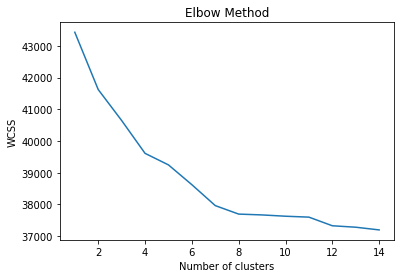

In [71]:
#Elbow Method, up to 15 clusters
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
#Fitting with 8 clusters
kmeans = KMeans(n_clusters=8, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y2 = kmeans.fit_predict(X)
#Checking how many from each classification are in each cluster
df2 = pd.DataFrame({'Classification': Y,
                      'Cluster': pred_y2})
df3 = pd.crosstab(df2['Cluster'], df2['Classification'])
df3



Classification,1,2,3,4
Cluster,,,,
0,45,36,39,31
1,122,82,182,130
2,175,186,165,186
3,807,1010,922,1017
4,13,25,33,23
5,122,159,120,96
6,354,168,173,141
7,262,234,266,276


In [20]:
df3.to_csv("8_clusters.csv")


In [7]:
#resampling
X1 = manipulated.sample(frac=1, replace=True)
X2 = manipulated.sample(frac=1, replace=True)
X3 = manipulated.sample(frac=1, replace=True)
X4 = manipulated.sample(frac=1, replace=True)
X5 = manipulated.sample(frac=1, replace=True)

#Sample 1
Summary1 = X1.iloc[:,1] # Just using the summary for now use 2 or title use 1
Sum = [re.sub(r'[^\w]', ' ', i) for i in Summary1.to_numpy()] 
ReviewVzer = CountVectorizer(min_df=2, tokenizer=nltk.word_tokenize, max_features=2500)
X1 = ReviewVzer.fit_transform(Sum)

#Sample 2
Summary2 = X2.iloc[:,1] # Just using the summary for now use 2 or title use 1
Sum = [re.sub(r'[^\w]', ' ', i) for i in Summary2.to_numpy()] 
ReviewVzer = CountVectorizer(min_df=2, tokenizer=nltk.word_tokenize, max_features=2500)
X2 = ReviewVzer.fit_transform(Sum)

#Sample 3
Summary3 = X3.iloc[:,1] # Just using the summary for now use 2 or title use 1
Sum = [re.sub(r'[^\w]', ' ', i) for i in Summary3.to_numpy()] 
ReviewVzer = CountVectorizer(min_df=2, tokenizer=nltk.word_tokenize, max_features=2500)
X3 = ReviewVzer.fit_transform(Sum)

#Sample 4
Summary4 = X4.iloc[:,1] # Just using the summary for now use 2 or title use 1
Sum = [re.sub(r'[^\w]', ' ', i) for i in Summary4.to_numpy()] 
ReviewVzer = CountVectorizer(min_df=2, tokenizer=nltk.word_tokenize, max_features=2500)
X4 = ReviewVzer.fit_transform(Sum)

#Sample 5
Summary5 = X5.iloc[:,1] # Just using the summary for now use 2 or title use 1
Sum = [re.sub(r'[^\w]', ' ', i) for i in Summary5.to_numpy()] 
ReviewVzer = CountVectorizer(min_df=2, tokenizer=nltk.word_tokenize, max_features=2500)
X5 = ReviewVzer.fit_transform(Sum)



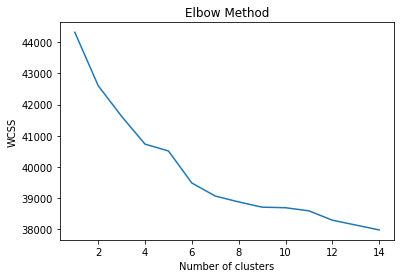

In [8]:
#Elbow Method, up to 15 clusters, bootstrap 1
wcss1 = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X1)
    wcss1.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss1)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

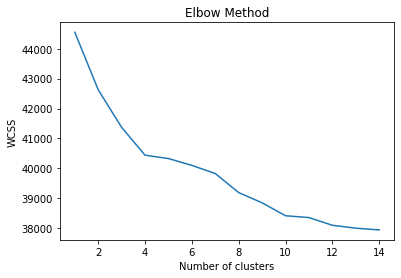

In [9]:
#Elbow Method, up to 15 clusters, bootstrap 2
wcss2 = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X2)
    wcss2.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss2)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

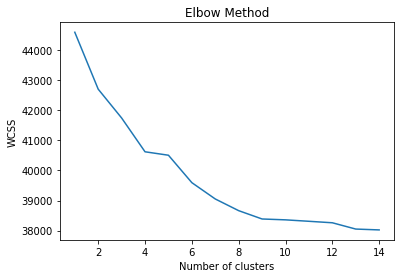

In [10]:
#Elbow Method, up to 15 clusters, bootstrap 3
wcss3 = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X3)
    wcss3.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss3)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

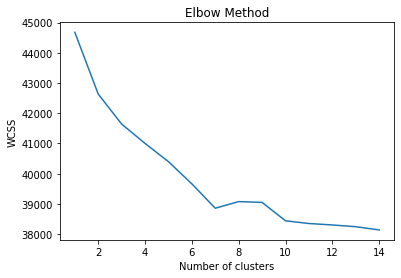

In [11]:
#Elbow Method, up to 15 clusters, bootstrap 4
wcss4 = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X4)
    wcss4.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss4)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

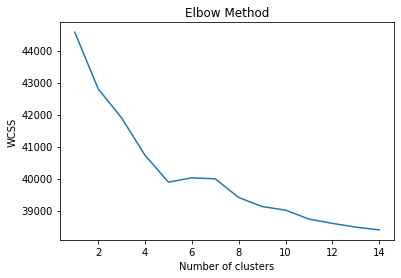

In [12]:
#Elbow Method, up to 15 clusters, bootstrap 5
wcss5 = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X5)
    wcss5.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss5)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
#Taking mean of variances across bootstraps
wccsb = list(zip(wcss1, wcss2, wcss3, wcss4, wcss5))
wccsb = np.asarray(wccsb)
wccsb = wccsb.T
wccs_boot_mean = wccsb.mean(axis=0)
wccs_boot_mean

array([44544.943     , 42675.75112777, 41655.57608801, 40704.80169726,
       40327.09797105, 39773.16990281, 39359.04741466, 39043.16754667,
       38824.00265509, 38583.97233489, 38468.6063451 , 38310.65641898,
       38183.00730628, 38095.92259026])

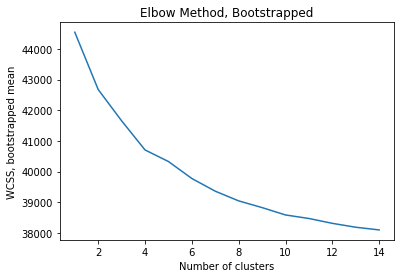

In [14]:
#Plotting mean of bootstraps
plt.plot(range(1, 15), wccs_boot_mean)
plt.title('Elbow Method, Bootstrapped')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS, bootstrapped mean')
plt.show()

In [17]:
#Fitting with 12 clusters
kmeans = KMeans(n_clusters=12, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y3 = kmeans.fit_predict(X)
#Checking how many from each classification are in each cluster
df4 = pd.DataFrame({'Classification': Y,
                      'Cluster': pred_y3})
df5 = pd.crosstab(df4['Cluster'], df4['Classification'])
df5

Classification,1,2,3,4
Cluster,,,,
0,774,923,870,918
1,324,246,324,296
2,27,60,51,62
3,35,92,69,128
4,118,142,116,136
5,9,12,0,10
6,45,36,39,31
7,316,148,134,114
8,120,159,117,94


In [21]:
df5.to_csv("12_clusters.csv")